## Classification
    

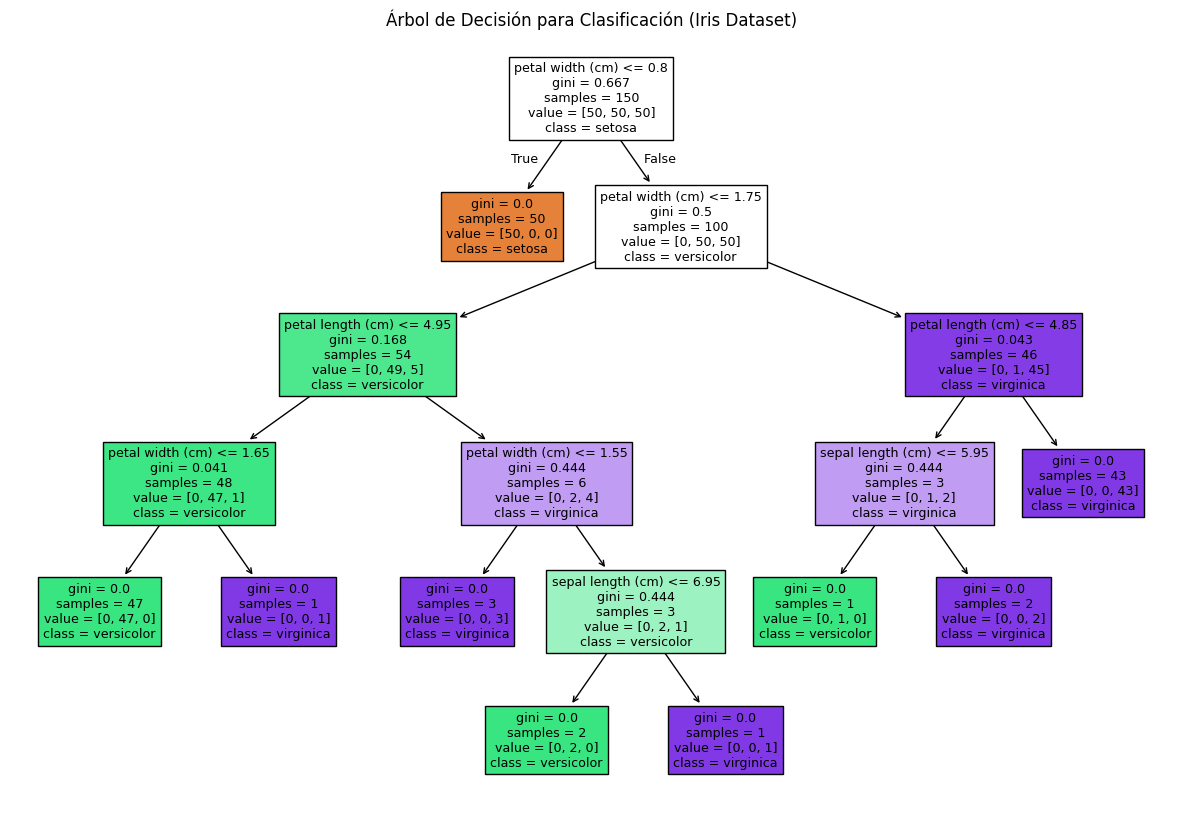

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un clasificador de árbol de decisión para clasificación

clf_classification = DecisionTreeClassifier()
clf_classification.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(
    clf_classification, 
    feature_names=iris.feature_names,
    class_names=iris.target_names, 
    filled=True
)
plt.title('Árbol de Decisión para Clasificación (Iris Dataset)')
plt.show()

## Regression


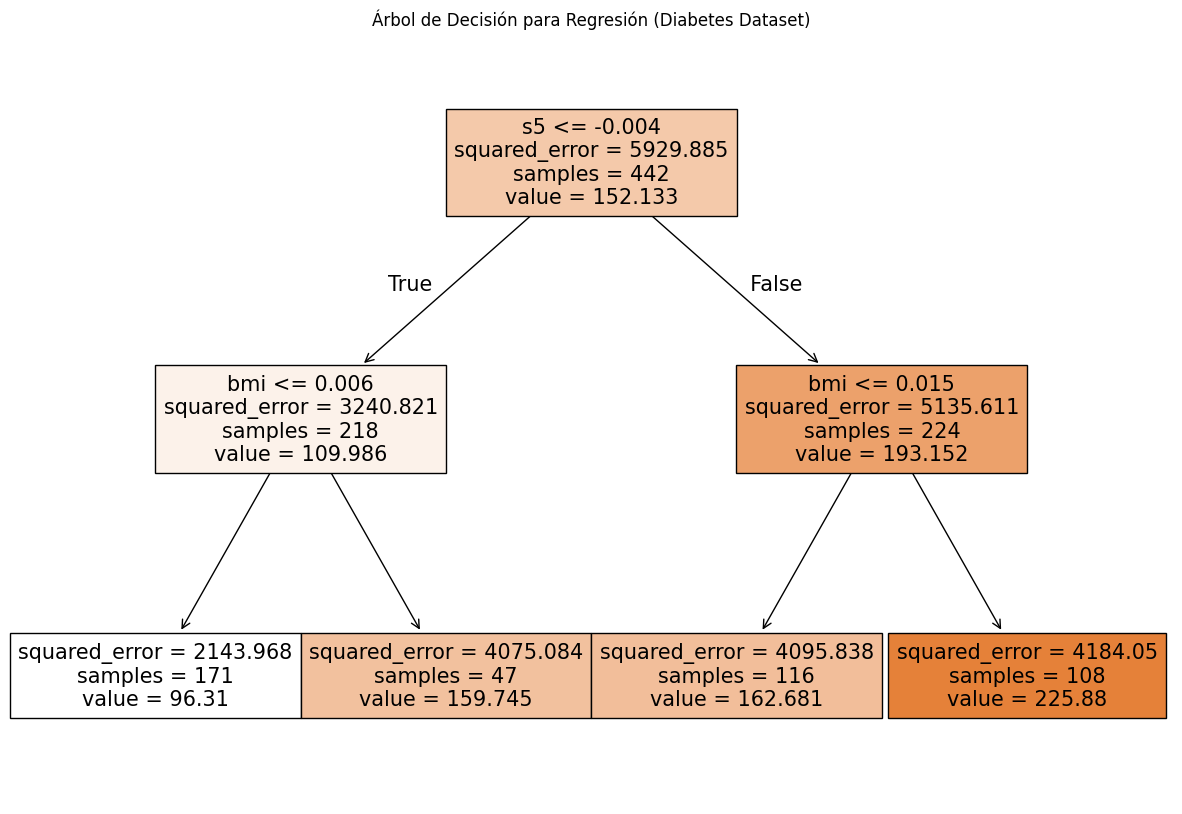

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Crear un regresor de árbol de decisión con profundidad máxima de 2

clf_regression_small = DecisionTreeRegressor(max_depth=2)
clf_regression_small.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))

plot_tree(
    clf_regression_small, 
    feature_names=diabetes.feature_names, 
    filled=True
)

plt.title('Árbol de Decisión para Regresión (Diabetes Dataset)')
plt.show()

## Feature Selection

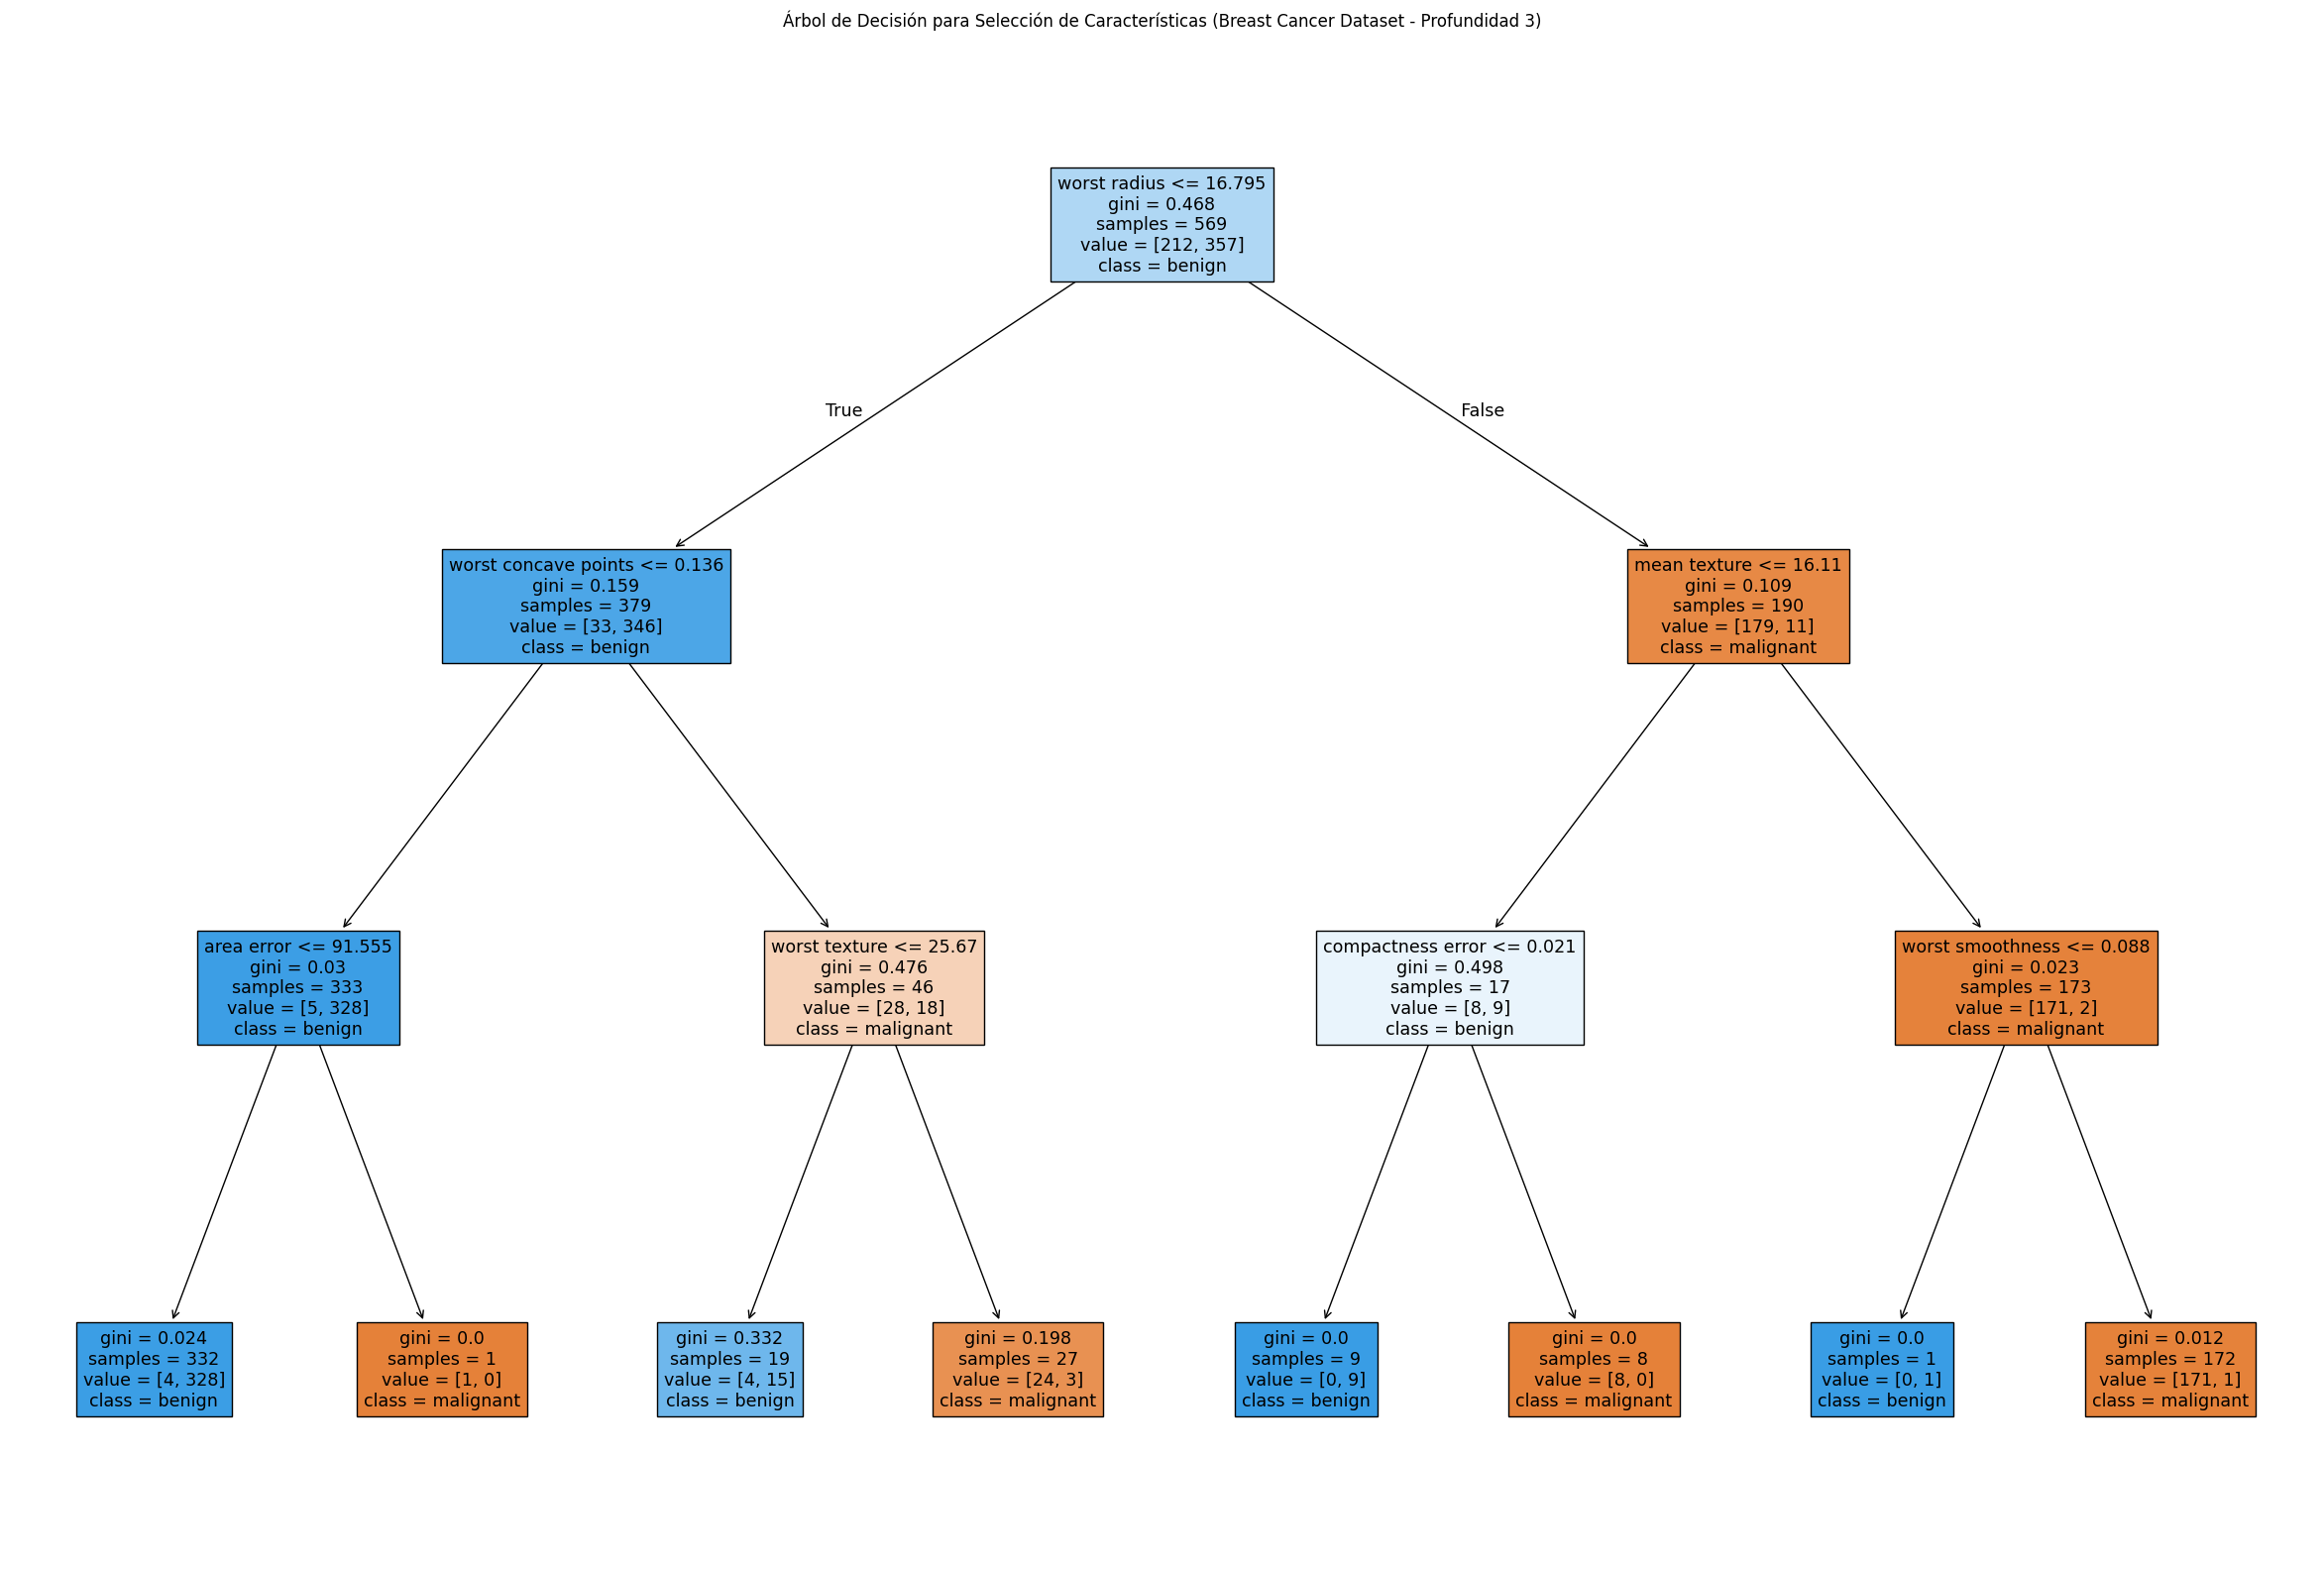

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Breast Cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Crear un clasificador de árbol de decisión limitado a 3 niveles

clf_feature_selection_depth_3 = DecisionTreeClassifier(max_depth=3)
clf_feature_selection_depth_3.fit(X, y)

# Visualizar el árbol de decisión

plt.figure(figsize=(30, 20))

plot_tree(
    clf_feature_selection_depth_3, 
    feature_names=cancer.feature_names, 
    class_names=cancer.target_names, 
    filled=True
)

plt.title('Árbol de Decisión para Selección de Características (Breast Cancer Dataset - Profundidad 3)')
plt.show()